In [1]:
import pandas as pd
from pandas_datareader import data
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Downloading dataset 
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [3]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
col_names = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
df = pd.DataFrame(data,columns=col_names)

In [5]:
df['MEDV'] = target

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
df.shape

(506, 14)

In [8]:
X = df.iloc[:,0:13]
y = df.iloc[:,13]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [10]:
rt = DecisionTreeRegressor(criterion = 'squared_error', max_depth=5)

In [11]:
rt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [12]:
y_pred = rt.predict(X_test)

In [13]:
r2_score(y_test,y_pred)

0.8833565347917995

# Hyperparameter Tuning

In [14]:
param_grid = {
    'max_depth':[2,4,6,8,10,12,15,None],
    'criterion':['squared_error','absolute_error','friedman_mse','poisson'],
    'max_features':[0.25,0.5,1.0,0.75],
    'min_samples_split':[0.25,0.5,1.0,0.75,0.1]
}

In [15]:
reg = GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=param_grid)

In [16]:
reg.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 15, None],
                         'max_features': [0.25, 0.5, 1.0, 0.75],
                         'min_samples_split': [0.25, 0.5, 1.0, 0.75, 0.1]})

In [17]:
reg.best_score_

0.8048502005710804

In [18]:
reg.best_params_

{'criterion': 'poisson',
 'max_depth': 10,
 'max_features': 0.75,
 'min_samples_split': 0.1}

In [19]:
rt_optimised = DecisionTreeRegressor(criterion = 'poisson', max_depth=5, max_features= 1.0, min_samples_split= 0.1)
rt_optimised.fit(X_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=5, max_features=1.0,
                      min_samples_split=0.1)

In [20]:
y_pred_opm = rt_optimised.predict(X_test)

In [21]:
r2_score(y_test,y_pred_opm)

0.8610515329743937

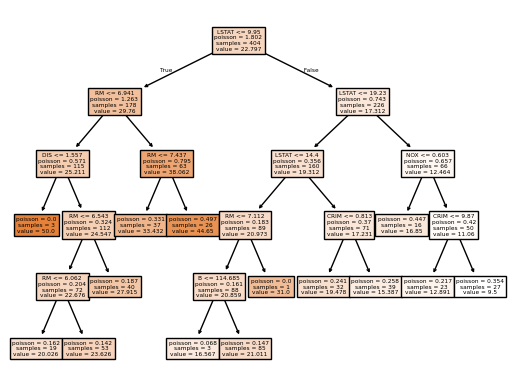

In [24]:
from sklearn.tree import plot_tree

plot_tree(rt_optimised, feature_names=X.columns,filled=True);

# Feature Importance
#### It tells us that how much importance was given to each feature, while building the Decision Trees
#### Particularly useful when working with High-Dimensional Data to drop not-so-impactful features

In [23]:
for importance, name in sorted(zip(rt.feature_importances_, X_train.columns), reverse=True):
  print(name, importance)

RM 0.6344993240692562
LSTAT 0.2056272015341764
CRIM 0.07395590730916864
DIS 0.06659581258598629
AGE 0.006176126174366619
NOX 0.005584332728321651
PTRATIO 0.004391097507128485
INDUS 0.002627468726682661
B 0.000542729364913084
ZN 0.0
TAX 0.0
RAD 0.0
CHAS 0.0
